In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("fruit_dataset.csv")
cols = ['mass','width','height','color_score']
X = df[cols]
y = df['fruit_label']
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
new_cols = ['mass', 'width', 'height']
X_new = X[new_cols]
X_val = X_new.values
minmaxscaler =  preprocessing.MinMaxScaler()
X_scaled = minmaxscaler.fit_transform(X_val)
normalized_X = pd.DataFrame(X_scaled, columns = new_cols)
normalized_X['color_score'] = X['color_score']
normalized_X.head()

,mass,width,height,color_score
0,0.405594,0.684211,0.507692,0.55
1,0.363636,0.578947,0.430769,0.59
2,0.349650,0.421053,0.492308,0.60
3,0.034965,0.105263,0.107692,0.80
4,0.027972,0.052632,0.092308,0.79


In [4]:
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y,test_size=0.2, stratify=y, random_state=0)

In [5]:
clf_lsvc = LinearSVC()
clf_lsvc.fit(X_train, y_train)
print("train accuracy = ", clf_lsvc.score(X_train, y_train) )
print("test accuracy = ", clf_lsvc.score(X_test, y_test))

train accuracy =  0.7872340425531915
test accuracy =  0.6666666666666666


In [6]:
clf_svc = SVC()
clf_svc.fit(X_train, y_train)
print("train accuracy = ", clf_svc.score(X_train, y_train) )
print("test accuracy = ", clf_svc.score(X_test, y_test))

train accuracy =  0.7446808510638298
test accuracy =  0.75


In [7]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
print("train accuracy = ", clf_lr.score(X_train, y_train) )
print("test accuracy = ", clf_lr.score(X_test, y_test))

train accuracy =  0.6382978723404256
test accuracy =  0.5


In [8]:
clf_dt = DecisionTreeClassifier(max_depth=5)
clf_dt.fit(X_train, y_train)
print("train accuracy = ", clf_dt.score(X_train, y_train) )
print("test accuracy = ", clf_dt.score(X_test, y_test))

train accuracy =  1.0
test accuracy =  0.9166666666666666


In [9]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
print("train accuracy = ", clf_rf.score(X_train, y_train) )
print("test accuracy = ", clf_rf.score(X_test, y_test))

train accuracy =  1.0
test accuracy =  0.9166666666666666


In [10]:
df_test = pd.read_csv("test_fruit_dataset.csv")
cols = ['mass', 'width', 'height', 'color_score']
X_test_new = df_test[cols]
y_test_new = df_test['fruit_label']
X_test_new.head()

,mass,width,height,color_score
0,172,7.2,7.1,0.55
1,176,7.4,7.6,0.59
2,166,6.9,7.0,0.60
3,159,7.3,7.3,0.67
4,168,7.0,7.2,0.69


In [11]:
new_cols = ['mass', 'width', 'height']
X_new = X_test_new[new_cols]
X_val = X_new.values
minmaxscaler =  preprocessing.MinMaxScaler()
X_scaled = minmaxscaler.fit_transform(X_val)
normalized_X_test = pd.DataFrame(X_scaled, columns = new_cols)
normalized_X_test['color_score'] = X_test_new['color_score']
normalized_X_test.head()

,mass,width,height,color_score
0,0.338129,0.478261,0.549020,0.55
1,0.352518,0.521739,0.647059,0.59
2,0.316547,0.413043,0.529412,0.60
3,0.291367,0.500000,0.588235,0.67
4,0.323741,0.434783,0.568627,0.69


In [12]:
predict_label = clf_rf.predict(normalized_X_test)
print(predict_label)

[1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]


In [13]:
print("Accuracy: ", metrics.accuracy_score(y_test_new, predict_label))

Accuracy:  1.0


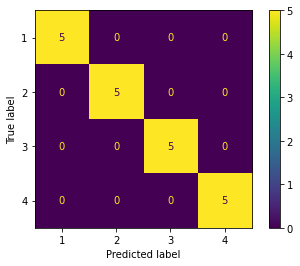

In [14]:
conf_matrix = confusion_matrix(y_test_new, predict_label, labels = clf_rf.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = clf_rf.classes_)
cm_disp.plot()
plt.show()